In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
from wordcloud import WordCloud
import squarify
import seaborn as ns
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

In [30]:
df = pd.read_excel('train_test1.xlsx')

In [31]:
df

,id_trx_penjualan,id_trx_penjualan_detail,tanggal_input_trx_detail,id_menu,nama_menu,no_meja,nama_pelanggan,kategori_menu,qty,harga_satuan,subtotal_bayar,tipe_pesanan
0,1902120002,15775,2019-02-12 15:34:00,S007,SINGKONG KEJU,GO FOOD,GO FOOD,Makanan,1,14000,14000,Delivery Order
1,1903270002,17676,2019-03-27 16:15:00,S007,SINGKONG KEJU,GO FOOD,GO FOOD,Makanan,1,14000,14000,Delivery Order
2,1903300026,17866,2019-03-30 22:16:00,S007,SINGKONG KEJU,GO FOOD,GO FOOD,Makanan,1,14000,14000,Delivery Order
3,1905270011,19940,2019-05-27 19:31:00,S007,SINGKONG KEJU,GO FOOD,GO FOOD,Makanan,1,14000,14000,Delivery Order
4,1906060014,20411,2019-06-06 19:58:00,S007,SINGKONG KEJU,GO FOOD,GO FOOD,Makanan,1,14000,14000,Delivery Order
...,...,...,...,...,...,...,...,...,...,...,...,...
11014,1907290012,22729,2019-07-29 21:45:00,1,AYAM SAMBAL MATAH,GO FOOD,GO FOOD,Makanan,1,19000,19000,Delivery Order
11015,1907310002,22819,2019-07-31 21:38:00,1,AYAM SAMBAL MATAH,GO FOOD,GO FOOD,Makanan,1,19000,19000,Delivery Order
11016,1908010013,22854,2019-08-01 21:08:00,1,AYAM SAMBAL MATAH,GO FOOD,GO FOOD,Makanan,1,19000,19000,Delivery Order
11017,1908060009,22933,2019-08-06 20:25:00,1,AYAM SAMBAL MATAH,GO FOOD,GO FOOD,Makanan,1,19000,19000,Delivery Order


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11019 entries, 0 to 11018
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   id_trx_penjualan          11019 non-null  int64         
 1   id_trx_penjualan_detail   11019 non-null  int64         
 2   tanggal_input_trx_detail  11019 non-null  datetime64[ns]
 3   id_menu                   11019 non-null  object        
 4   nama_menu                 11019 non-null  object        
 5   no_meja                   11019 non-null  object        
 6   nama_pelanggan            10777 non-null  object        
 7   kategori_menu             11019 non-null  object        
 8   qty                       11019 non-null  int64         
 9   harga_satuan              11019 non-null  int64         
 10  subtotal_bayar            11019 non-null  int64         
 11  tipe_pesanan              11019 non-null  object        
dtypes: datetime64[ns](

(-0.5, 511.5, 383.5, -0.5)

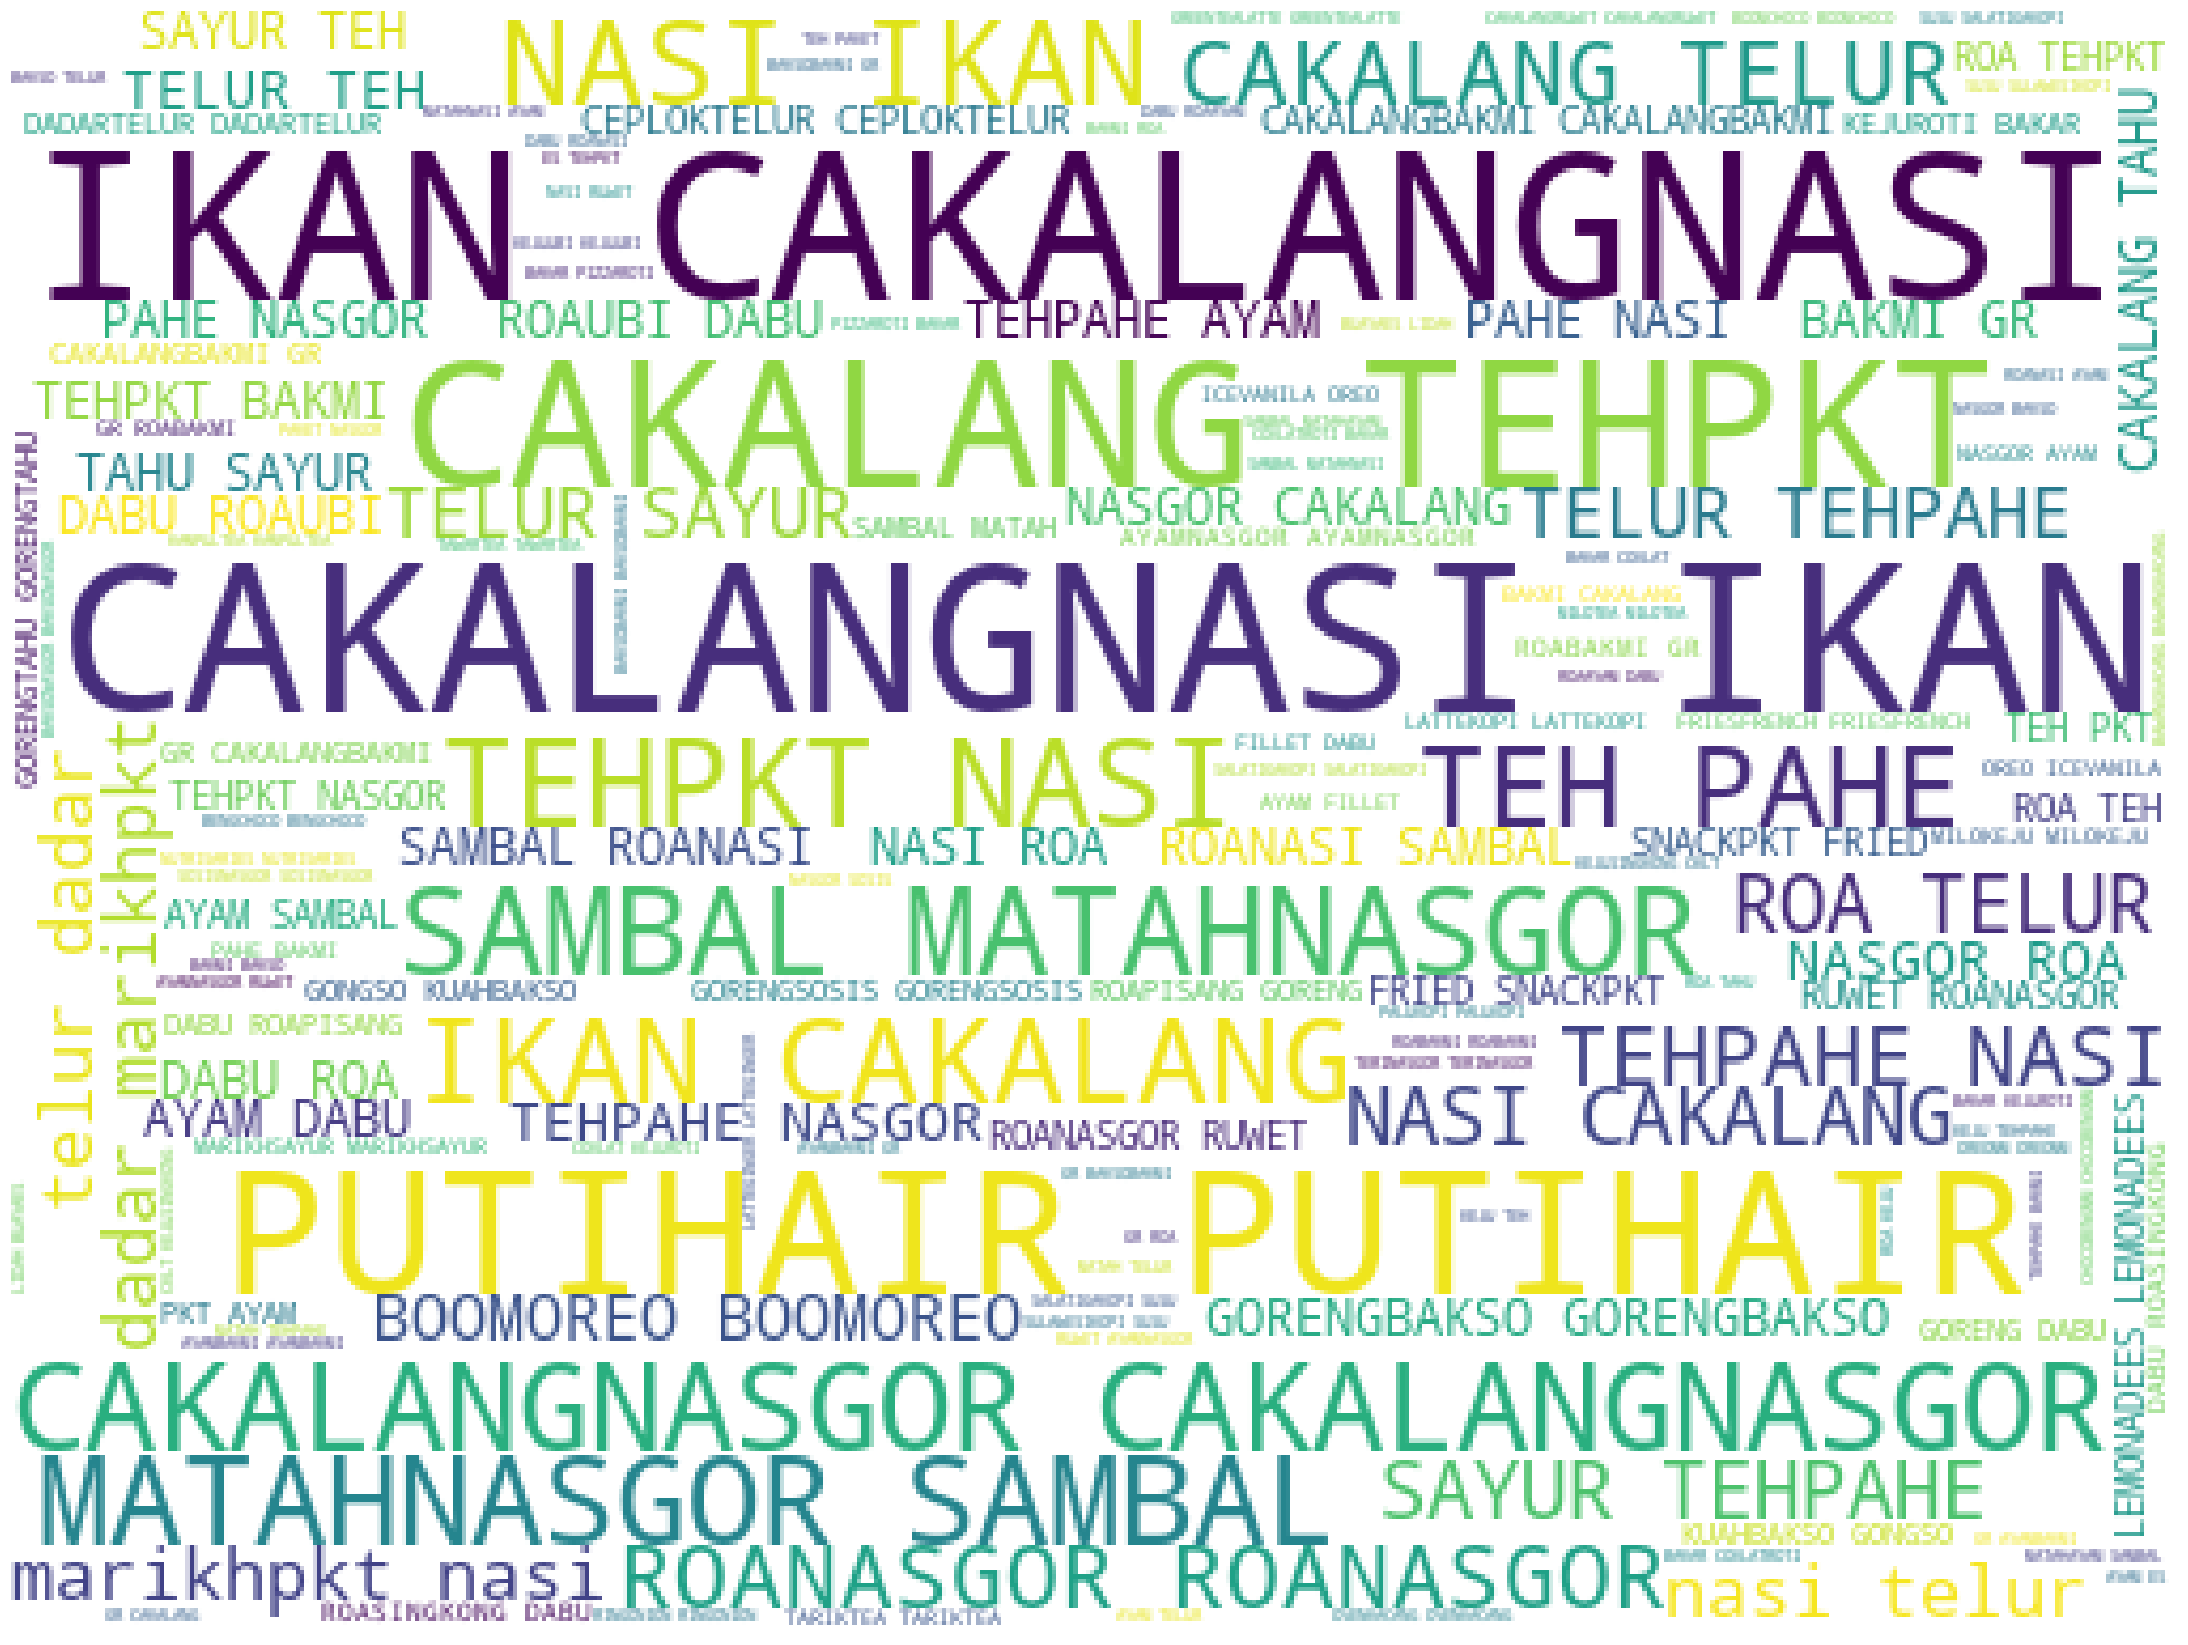

In [33]:
plt.subplots(figsize=(50,30))
wordcloud = WordCloud(background_color = 'white',
                     width=512,
                     height=384).generate("".join(df['nama_menu']))

plt.imshow(wordcloud)
plt.axis('off')

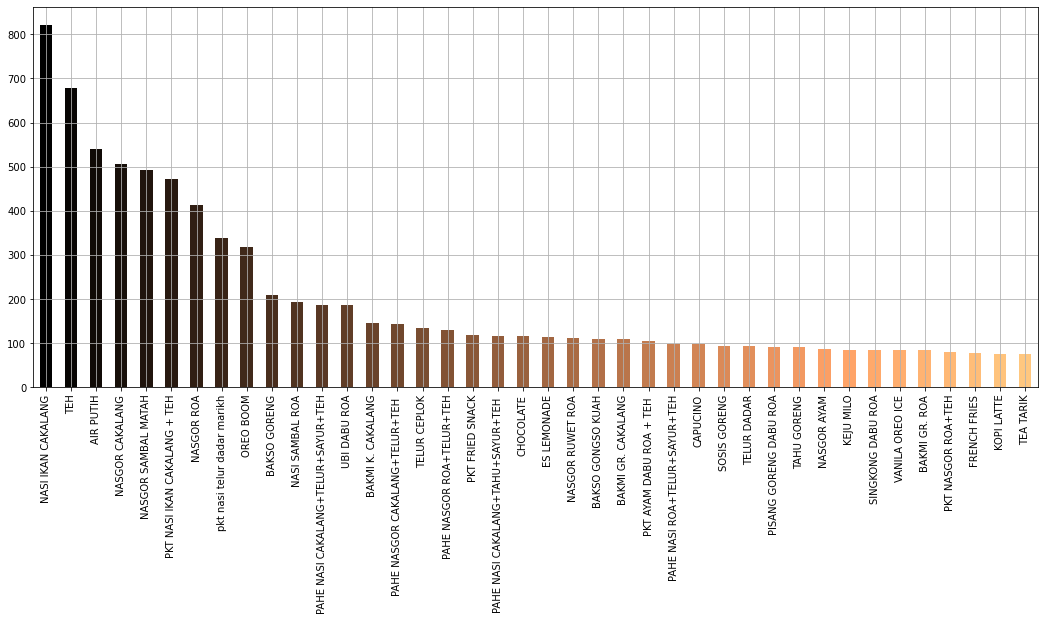

In [34]:
# looking at the frequency of most popular items
plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 40))
df['nama_menu'].value_counts().head(40).plot.bar(color = color)
plt.title("", fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

In [35]:
df = df.drop(columns=['id_menu','id_trx_penjualan_detail', 'no_meja', 'tanggal_input_trx_detail',
                      'nama_pelanggan','kategori_menu', 'harga_satuan', 'subtotal_bayar', 'tipe_pesanan'])

In [36]:
data = pd.pivot_table(df, values='qty', index='id_trx_penjualan', columns='nama_menu')

In [37]:
data.head()

nama_menu,AIR PUTIH,AYAM DABU ROA,AYAM SAMBAL MATAH,BAKMI GONGSO KUAH,BAKMI GR. BAKSO,BAKMI GR. TERI S,BAKMI GR. AYAM,BAKMI GR. BAKSO,BAKMI GR. CAKALANG,BAKMI GR. ROA,...,TELUR CEPLOK,TELUR DADAR,TELUR DADAR,Topping Keju,UBI DABU ROA,UBI KEJU,VANILA OREO ICE,VANILA OREO ICE,pkt nasi telur dadar marikh,pkt ruwet cakalang + teh
id_trx_penjualan,,,,,,,,,,,,,,,,,,,,,
1810100001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810100002,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810100003,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810100004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1810100005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
df_clean = data.fillna(0)

In [39]:
df_clean.head()

nama_menu,AIR PUTIH,AYAM DABU ROA,AYAM SAMBAL MATAH,BAKMI GONGSO KUAH,BAKMI GR. BAKSO,BAKMI GR. TERI S,BAKMI GR. AYAM,BAKMI GR. BAKSO,BAKMI GR. CAKALANG,BAKMI GR. ROA,...,TELUR CEPLOK,TELUR DADAR,TELUR DADAR,Topping Keju,UBI DABU ROA,UBI KEJU,VANILA OREO ICE,VANILA OREO ICE,pkt nasi telur dadar marikh,pkt ruwet cakalang + teh
id_trx_penjualan,,,,,,,,,,,,,,,,,,,,,
1810100001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810100002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810100003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810100004,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1810100005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
def encode_units(x):
  if x <= 0:
    return 0
  if x >= 1:
    return 1

df_basket = df_clean.applymap(encode_units)
df_basket.head()

nama_menu,AIR PUTIH,AYAM DABU ROA,AYAM SAMBAL MATAH,BAKMI GONGSO KUAH,BAKMI GR. BAKSO,BAKMI GR. TERI S,BAKMI GR. AYAM,BAKMI GR. BAKSO,BAKMI GR. CAKALANG,BAKMI GR. ROA,...,TELUR CEPLOK,TELUR DADAR,TELUR DADAR,Topping Keju,UBI DABU ROA,UBI KEJU,VANILA OREO ICE,VANILA OREO ICE,pkt nasi telur dadar marikh,pkt ruwet cakalang + teh
id_trx_penjualan,,,,,,,,,,,,,,,,,,,,,
1810100001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810100002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810100003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810100004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810100005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
df_basket

nama_menu,AIR PUTIH,AYAM DABU ROA,AYAM SAMBAL MATAH,BAKMI GONGSO KUAH,BAKMI GR. BAKSO,BAKMI GR. TERI S,BAKMI GR. AYAM,BAKMI GR. BAKSO,BAKMI GR. CAKALANG,BAKMI GR. ROA,...,TELUR CEPLOK,TELUR DADAR,TELUR DADAR,Topping Keju,UBI DABU ROA,UBI KEJU,VANILA OREO ICE,VANILA OREO ICE,pkt nasi telur dadar marikh,pkt ruwet cakalang + teh
id_trx_penjualan,,,,,,,,,,,,,,,,,,,,,
1810100001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810100002,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810100003,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810100004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1810100005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1910010002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1910010003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1910010004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [42]:
df_basket.columns

Index(['AIR PUTIH', 'AYAM DABU ROA', 'AYAM SAMBAL MATAH', 'BAKMI GONGSO KUAH',
       'BAKMI GR.  BAKSO', 'BAKMI GR.  TERI S', 'BAKMI GR. AYAM',
       'BAKMI GR. BAKSO', 'BAKMI GR. CAKALANG', 'BAKMI GR. ROA',
       ...
       'TELUR CEPLOK', 'TELUR DADAR', 'TELUR DADAR ', 'Topping Keju',
       'UBI DABU ROA', 'UBI KEJU', 'VANILA OREO ICE', 'VANILA OREO ICE ',
       'pkt nasi telur dadar marikh', 'pkt ruwet cakalang + teh'],
      dtype='object', name='nama_menu', length=218)

In [27]:
df_basket.index

Int64Index([1810100001, 1810100002, 1810100003, 1810100004, 1810100005,
            1810100006, 1810100007, 1810100008, 1810100009, 1810100010,
            ...
            1909300012, 1909300013, 1909300014, 1909300015, 1910010001,
            1910010002, 1910010003, 1910010004, 1910010005, 1910010006],
           dtype='int64', name='id_trx_penjualan', length=4625)

In [28]:
df_basket.iloc[0]

nama_menu
AIR PUTIH                      0
AYAM DABU ROA                  0
AYAM SAMBAL MATAH              0
BAKMI GONGSO KUAH              0
BAKMI GR.  BAKSO               0
                              ..
UBI KEJU                       0
VANILA OREO ICE                0
VANILA OREO ICE                0
pkt nasi telur dadar marikh    0
pkt ruwet cakalang + teh       0
Name: 1810100001, Length: 218, dtype: int64

In [71]:
frequent_itemsets = apriori(df_basket, min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values(by='support', ascending=False, na_position='last', inplace = True)
frequent_itemsets

,support,itemsets
24,0.169514,(NASI IKAN CAKALANG)
46,0.126054,(TEH)
0,0.104649,(AIR PUTIH)
23,0.100757,(NASGOR SAMBAL MATAH)
39,0.098595,(PKT NASI IKAN CAKALANG + TEH)
...,...,...
11,0.011676,(ES NUTRISARI)
33,0.011676,(PAKET NASGOR CAKALANG + TEH )
14,0.010595,(KACANG BAWANG)
27,0.010378,(PAHE NASGOR AYAM+TELUR+TEH)


In [72]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.sort_values(by='lift', ascending=False, na_position='last', inplace = True)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
16,(pkt nasi telur dadar marikh),(SOSIS GORENG),0.068973,0.019676,0.016865,0.244514,12.427228,0.015508,1.297608
17,(SOSIS GORENG),(pkt nasi telur dadar marikh),0.019676,0.068973,0.016865,0.857143,12.427228,0.015508,6.517189
3,(pkt nasi telur dadar marikh),(BAKSO GORENG),0.068973,0.043243,0.025297,0.366771,8.481583,0.022315,1.510918
2,(BAKSO GORENG),(pkt nasi telur dadar marikh),0.043243,0.068973,0.025297,0.585000,8.481583,0.022315,2.243439
20,(NASGOR ROA),(NASGOR CAKALANG),0.075027,0.089730,0.016216,0.216138,2.408771,0.009484,1.161264


In [73]:
#filtering
rules[ (rules['lift'] >= 1) & 
      (rules['confidence'] >= 0.8)]

app_result = rules.sort_values(by='confidence', ascending=False)
app_result

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
17,(SOSIS GORENG),(pkt nasi telur dadar marikh),0.019676,0.068973,0.016865,0.857143,12.427228,0.015508,6.517189
2,(BAKSO GORENG),(pkt nasi telur dadar marikh),0.043243,0.068973,0.025297,0.585000,8.481583,0.022315,2.243439
3,(pkt nasi telur dadar marikh),(BAKSO GORENG),0.068973,0.043243,0.025297,0.366771,8.481583,0.022315,1.510918
1,(AIR PUTIH),(NASI IKAN CAKALANG),0.104649,0.169514,0.036541,0.349174,2.059857,0.018801,1.276049
13,(OREO BOOM),(NASI IKAN CAKALANG),0.063135,0.169514,0.017514,0.277397,1.636432,0.006811,1.149299
5,(NASGOR CAKALANG),(TEH),0.089730,0.126054,0.022054,0.245783,1.949823,0.010743,1.158746
16,(pkt nasi telur dadar marikh),(SOSIS GORENG),0.068973,0.019676,0.016865,0.244514,12.427228,0.015508,1.297608
19,(NASGOR ROA),(TEH),0.075027,0.126054,0.016649,0.221902,1.760372,0.007191,1.123182
20,(NASGOR ROA),(NASGOR CAKALANG),0.075027,0.089730,0.016216,0.216138,2.408771,0.009484,1.161264
0,(NASI IKAN CAKALANG),(AIR PUTIH),0.169514,0.104649,0.036541,0.215561,2.059857,0.018801,1.141391


In [59]:
app_result.count()

antecedents           28
consequents           28
antecedent support    28
consequent support    28
support               28
confidence            28
lift                  28
leverage              28
conviction            28
dtype: int64